# 1 Linear Regression - curve fitting (Python)

## 1.1 Data generation

\begin{equation}
t = w_2x^2 + w_1x +w_0
\end{equation}


This is the "true" model for the curve.

In [1]:
import random

# get ground-truth data from the "true" model 
n = 20  # number of data samples
x = [(idx-round(n/2))/(n/2) for idx in range(n)]
print(x)

w = [1, 2, 3]
t = [xn**2*w[2] + xn*w[1] + w[0] for xn in x]
print(t)

# adding noise to "simulate" the observed target values
std_noise = 0.2
t_observed = [t[idx]+random.gauss(0,std_noise) for idx in range(n)]

[-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
[2.0, 1.6300000000000001, 1.3200000000000003, 1.0699999999999998, 0.8800000000000001, 0.75, 0.68, 0.67, 0.72, 0.83, 1.0, 1.23, 1.52, 1.87, 2.2800000000000002, 2.75, 3.2800000000000002, 3.8699999999999997, 4.5200000000000005, 5.23]


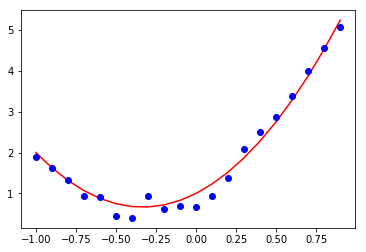

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the curve and the noise-corrupted data
plt.plot(x,t,'r')
plt.plot(x,t_observed,'bo')

## 1.2 Model Fitting
Re-arrange to a linear system in matrix form $\textbf{a}\textbf{x}=\textbf{b}$ (N.B. the x is the unknown here, not the learning input x):

\begin{equation}
\textbf{t} = \textbf{X}\textbf{w}
\end{equation}

that is:

\begin{equation}
\begin{vmatrix}
t_{(1)} \\ t_{(2)} \\ \cdots \\ t_{(n)}
\end{vmatrix} = \begin{vmatrix}
x^2_{(1)} & x_{(1)} & 1 \\
x^2_{(2)} & x_{(2)} & 1 \\
& \cdots \\
x^2_{(n)} & x_{(n)} & 1 
\end{vmatrix} \cdot
\begin{vmatrix}
w_2 \\ w_1 \\ w_0
\end{vmatrix}
\end{equation}



[[ 1.   -1.    1.  ]
 [ 0.81 -0.9   1.  ]
 [ 0.64 -0.8   1.  ]
 [ 0.49 -0.7   1.  ]
 [ 0.36 -0.6   1.  ]
 [ 0.25 -0.5   1.  ]
 [ 0.16 -0.4   1.  ]
 [ 0.09 -0.3   1.  ]
 [ 0.04 -0.2   1.  ]
 [ 0.01 -0.1   1.  ]
 [ 0.    0.    1.  ]
 [ 0.01  0.1   1.  ]
 [ 0.04  0.2   1.  ]
 [ 0.09  0.3   1.  ]
 [ 0.16  0.4   1.  ]
 [ 0.25  0.5   1.  ]
 [ 0.36  0.6   1.  ]
 [ 0.49  0.7   1.  ]
 [ 0.64  0.8   1.  ]
 [ 0.81  0.9   1.  ]]
(20, 3)
(20, 1)
[[3.07773658]
 [2.08787016]
 [0.93194893]]


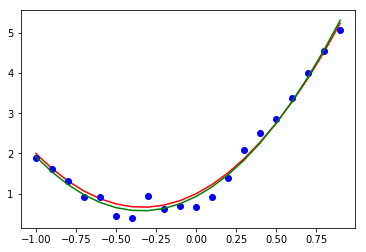

In [5]:
import numpy as np

# then use nunmpy for a least-square solution to the linear system "Xw=t"
t_observed = np.reshape(t_observed, [-1, 1])
x_1 = np.reshape(x, [-1, 1])
x_2 = np.square(x_1)
x_0 = np.ones_like(x_1)
X = np.concatenate([x_2,x_1,x_0],1)
# print to check the inputs
print(X)
print(X.shape)
print(t_observed.shape)
w_estimate = np.linalg.lstsq(X, t_observed, rcond=None)
print(w_estimate[0])  # print the output

# plot to see the estimated curve, i.e.
# t_estimate = [xn**2*w_estimate[2]+xn*w_estimate[1]+w_estimate[0] for xn in x]
# but matrix multiplication is more compact:
t_estimate = np.matmul(X,w_estimate[0])

plt.plot(x,t,'r')
plt.plot(x,t_observed,'bo')
plt.plot(x,t_estimate,'g')

## 1.3 Model Fitting Error
This is also known as training error.

0.5805737219838287
0.1703780681284755


(array([1., 2., 0., 1., 5., 0., 4., 2., 1., 4.]),
 array([-0.35810049, -0.29722313, -0.23634578, -0.17546842, -0.11459106,
        -0.0537137 ,  0.00716366,  0.06804102,  0.12891837,  0.18979573,
         0.25067309]),
 <a list of 10 Patch objects>)

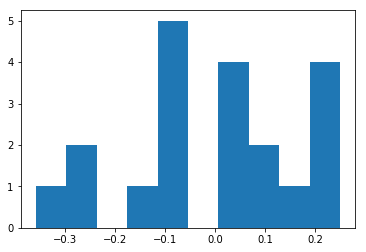

In [4]:
# residuals:
Residuals = t_estimate-t_observed
SR = np.sum(np.square(Residuals))  # sums of residuals: b - a*x
# root-mean-square error
RMSE = np.sqrt(np.mean(np.square(Residuals)))
print(SR)
print(RMSE)

# plot the error distribution
plt.hist(Residuals)

## Questions
### Sample size
- Effect on changing the sample size on model fitting and its errors.
- How many samples are needed?

### Model fitting
- What is the objective (loss) function?
- What is the difference to the true target values?
- How to measure goodness-of-fit?